# Homework Stage 08 Exploratory Data Analysis

## Starter Instruction:
Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

Requirement:
1. Statistical Summaries
2. Distributional plots (visualization)
3. Bivariate Visuals (at least 2 relationships)
4. Correlation Heatmap
5. Documenting findings, risks, and assumption

In [12]:
#import Library and Creating the Data Set
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1a) Statistical Summary

In [16]:

#make sure NA value is present
df.isna().sum()

#Note = The NA values are present in the following columns:
# - income: 5 missing values
# - spend: 3 missing values
# - transactions: 2 missing values

date            0
region          0
age             0
income          5
transactions    0
spend           3
dtype: int64

In [ ]:
#information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int64         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 7.6+ KB


In [18]:
# Statistics of the data set
df.describe(include='all')

,date,region,age,income,transactions,spend
count,160,160,160.000000,155.000000,160.00000,157.000000
unique,NaN,4,NaN,NaN,NaN,NaN
top,NaN,West,NaN,NaN,NaN,NaN
freq,NaN,47,NaN,NaN,NaN,NaN
mean,2021-04-21 12:00:00,NaN,40.018750,41983.866323,3.23750,117.291592
min,2021-02-01 00:00:00,NaN,22.000000,17928.800000,0.00000,0.540000
25%,2021-03-12 18:00:00,NaN,34.700000,32471.530000,2.00000,77.250000
50%,2021-04-21 12:00:00,NaN,40.150000,39332.520000,3.00000,119.320000
75%,2021-05-31 06:00:00,NaN,44.925000,49697.690000,4.00000,153.340000
max,2021-07-10 00:00:00,NaN,61.100000,87052.400000,20.00000,280.050000


## 1b) Numeric profile

In [ ]:
#Code from The Starter Pack

desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


In [ ]:
#Recreate: More detailed statistics (skewness and kurtosis)

summary = df.describe().T  # transpose for readability
summary['skewness'] = df.skew(numeric_only=True)
summary['kurtosis'] = df.kurtosis(numeric_only=True)
summary


,count,mean,min,25%,50%,75%,max,std,skewness,kurtosis
date,160,2021-04-21 12:00:00,2021-02-01 00:00:00,2021-03-12 18:00:00,2021-04-21 12:00:00,2021-05-31 06:00:00,2021-07-10 00:00:00,NaN,NaN,NaN
age,160.0,40.01875,22.0,34.7,40.15,44.925,61.1,8.458676,0.070198,-0.044228
income,155.0,41983.866323,17928.8,32471.53,39332.52,49697.69,87052.4,13262.457038,1.003070,0.988794
transactions,160.0,3.2375,0.0,2.0,3.0,4.0,20.0,2.58561,3.498967,20.662136
spend,157.0,117.291592,0.54,77.25,119.32,153.34,280.05,51.768645,0.132126,-0.048472


## 2) Distributions Plot (Visualization)

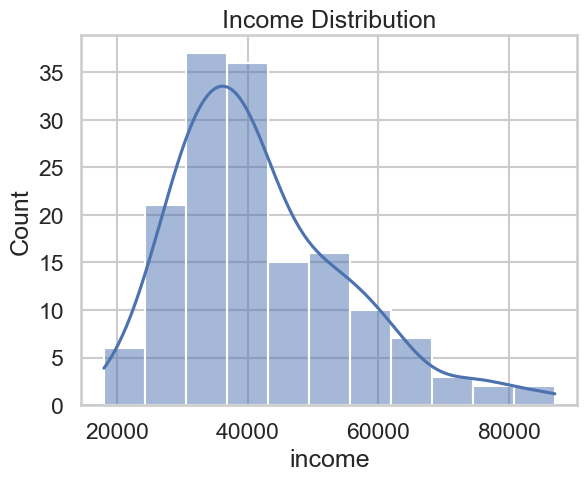

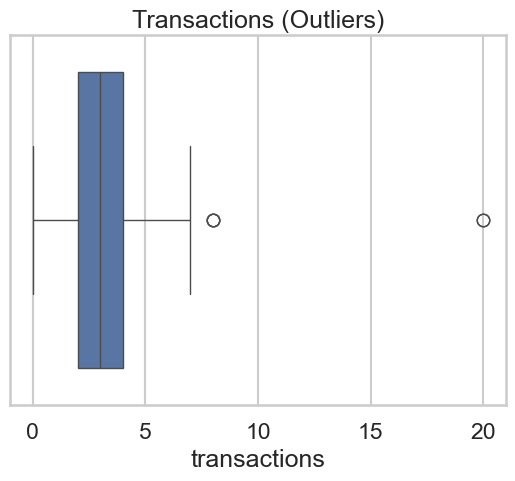

In [26]:
# /From The Starter Pack/

# TODO: histogram + KDE for a key variable
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.show()

# TODO: boxplot for outliers
sns.boxplot(x=df['transactions'])
plt.title('Transactions (Outliers)')
plt.show()

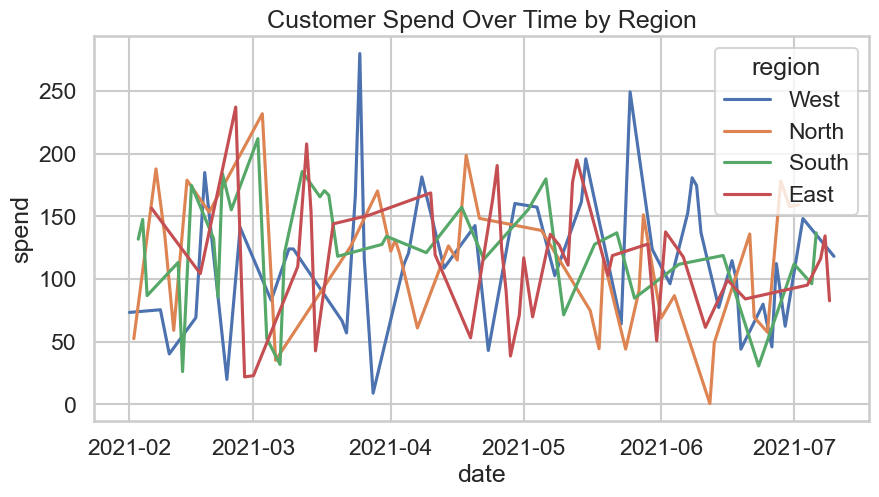

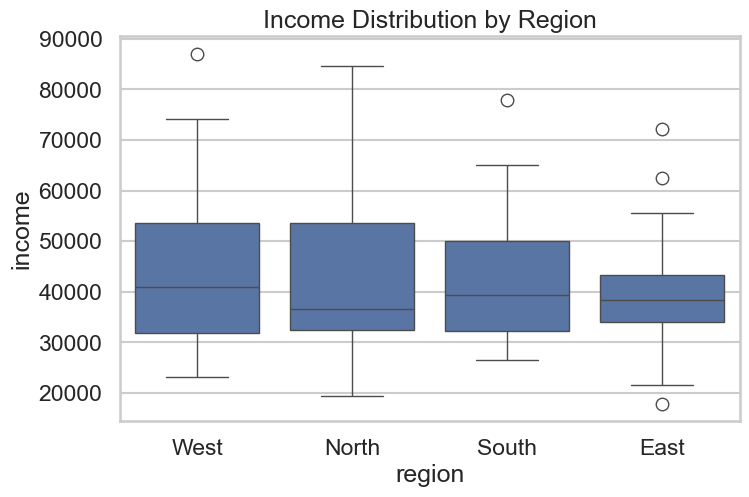

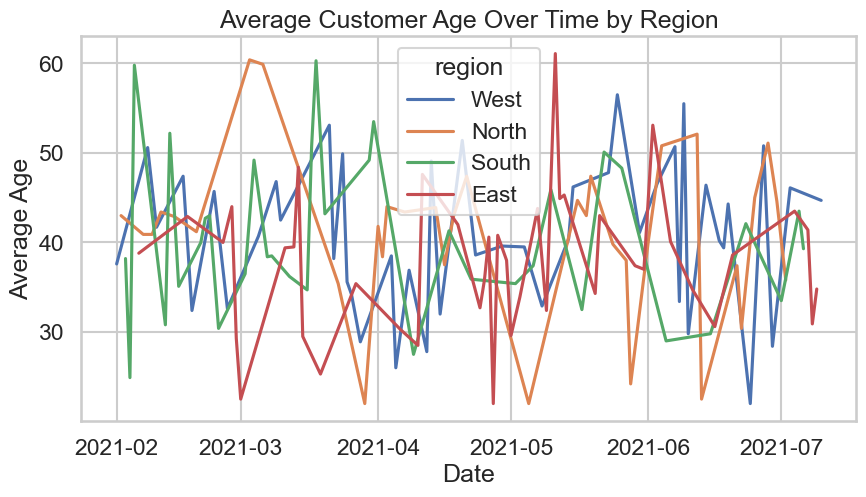

In [32]:
#Creating Data Visualizations

import os

# make sure "data" folder exists
os.makedirs("data", exist_ok=True)

# 1. Time Series Line Plot
# showing trends and seasonality (Shows overall spending patterns and regional differences)
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='date', y='spend', hue='region')
plt.title("Customer Spend Over Time by Region")
plt.savefig("data/processed_timeseries-chart.png", dpi=300, bbox_inches="tight")
plt.show()  # Show the plot
plt.close()

# 2. Box Plot
# comparing distribution across categories (Shows income distribution variations by region)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='region', y='income')
plt.title("Income Distribution by Region")
plt.savefig("data/processed_boxplot-chart.png", dpi=300, bbox_inches="tight")
plt.show()  # Show the plot
plt.close()

#3. Aggregate time series to show what people's age in each region 
# group by date + region
age_trend = df.groupby(['date', 'region'])['age'].mean().reset_index()

# plot time series of average age
plt.figure(figsize=(10,5))
sns.lineplot(data=age_trend, x='date', y='age', hue='region')
plt.title("Average Customer Age Over Time by Region")
plt.ylabel("Average Age")
plt.xlabel("Date")
plt.savefig("data/processed_age-timeseries-chart.png", dpi=300, bbox_inches="tight")
plt.show()  # Show the plot
plt.close()

#All the plots is saved into data folder

## 3) Bivariate Visuals (at least 2 relationships)

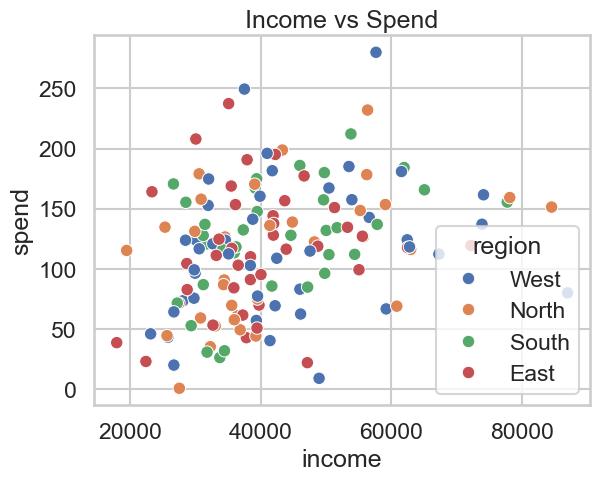

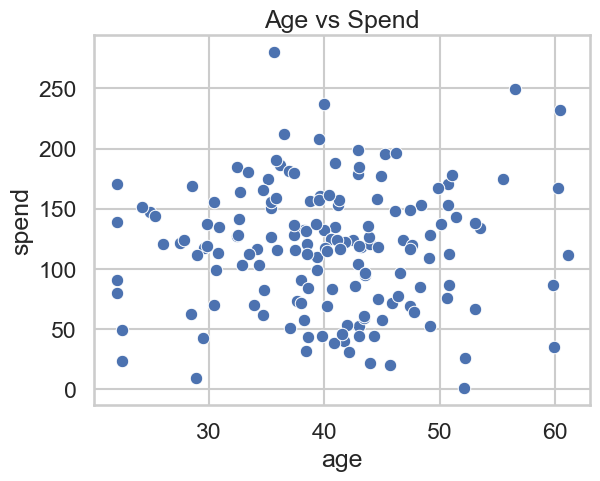

In [ ]:
#from the starter pack

sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend')
plt.show()

sns.scatterplot(data=df, x='age', y='spend')
plt.title('Age vs Spend')
plt.show()

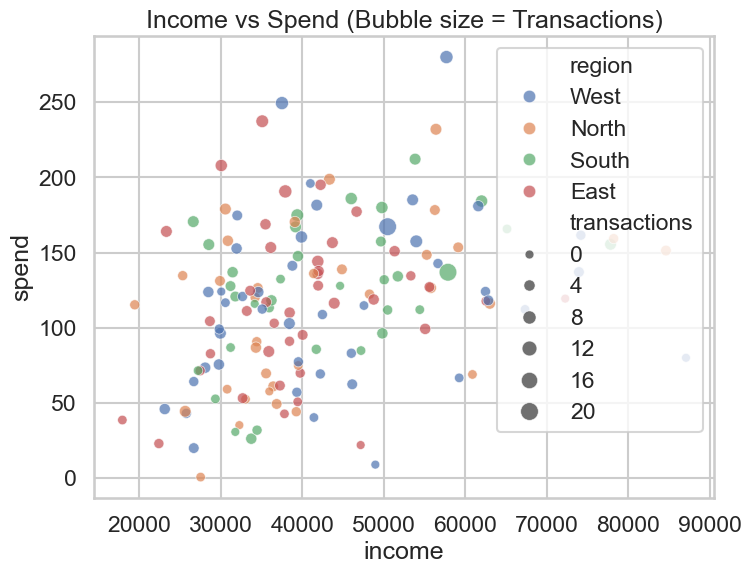

In [ ]:
# 1. Scatter Plot of Income vs Spend (Bubble Size Transaction)
# spotting correlations & clusters (Shows relationship between income and spend, with transactions as bubble size)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='income', y='spend',
                size='transactions', hue='region', alpha=0.7)
plt.title("Income vs Spend (Bubble size = Transactions)")
plt.savefig("data/processed_scatter-chart.png", dpi=300, bbox_inches="tight")
plt.show()  # Show the plot
plt.close()

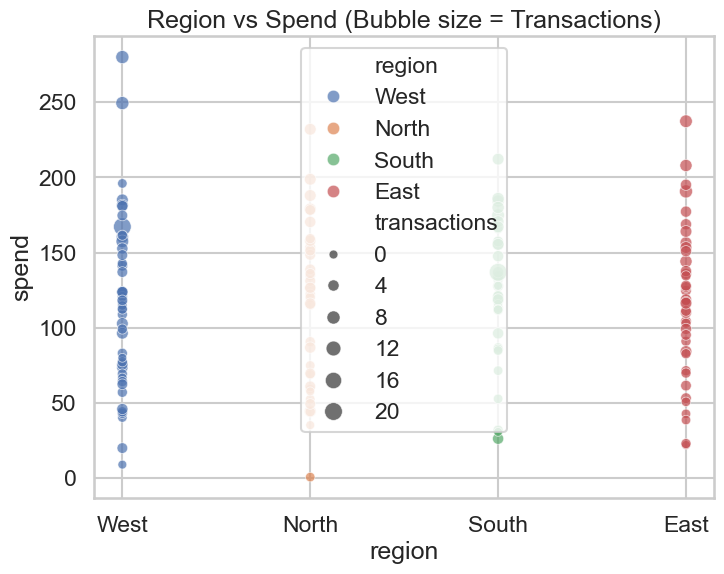

In [ ]:
# 2. Scatter Plot of Region vs Spend
#we can se normal disribution is similar for each region (people mosly spend around 50 - 200)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='region', y='spend',
                size='transactions', hue='region', alpha=0.7)
plt.title("Region vs Spend (Bubble size = Transactions)")
plt.savefig("data/processed_scatter-region-chart.png", dpi=300, bbox_inches="tight")
plt.show()  # Show the plot
plt.close()

## 4) Correlation matrix

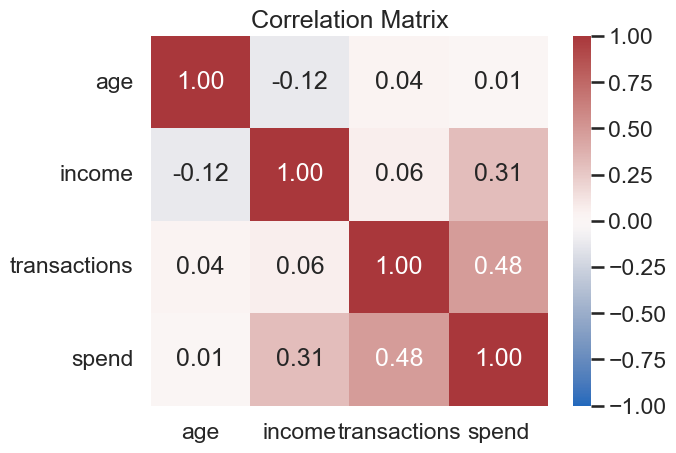

,age,income,transactions,spend
age,1.000000,-0.123160,0.037754,0.008174
income,-0.123160,1.000000,0.063573,0.307307
transactions,0.037754,0.063573,1.000000,0.480685
spend,0.008174,0.307307,0.480685,1.000000


In [35]:
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig("data/processed_correlation-matrix-chart.png", dpi=300, bbox_inches="tight")
plt.show()
corr

## 5) Insights & Assumptions (write your commentary)

### Insight
First, there are clear regional differences in both spending and income distributions. This suggests that the region variable is likely to play an important role in downstream modeling, especially when explaining or predicting customer spending behavior. Second, the relationship between income, transactions, and spend indicates that while income is positively correlated with spending, the number of transactions appears to be a stronger driver. In fact, the scatter plots suggest an interaction effect: customers with both high income and a large number of transactions tend to spend disproportionately more. Third, demographic variation also emerges as a relevant factor. The average customer age by region fluctuates over time, and while this effect is partly random in the synthetic data, in a real-world setting such trends could reveal meaningful demographic shifts that influence spending patterns.

### Assumption and Risks
Several assumptions and risks are important to note. The dataset used here is synthetic, which means it may not reflect real-world complexities such as seasonality, systematic missingness, or structural demographic biases. Furthermore, age is treated as a random assignment per record in this dataset, whereas in practice it would be stable for each individual over time. This could artificially distort correlations with other variables. Finally, the random injection of missing values and outliers may not accurately capture the way such issues arise in real datasets—for example, due to reporting errors, churn, or unusual customer behavior.

### Next Steps before Modelling (cleaning & features)
Before moving into modeling, several steps in cleaning and feature preparation are required. Missing values in income and spend should be addressed, possibly through median imputation or region-specific strategies. Outliers in transactions need to be treated carefully, either through capping or robust scaling. The date variable should be set as a proper datetime index to enable time-series feature creation. Beyond cleaning, several engineered features may strengthen predictive performance. These include spend per transaction, the ratio of spend to income, and rolling averages of spend or transactions over 7- or 30-day windows. Aggregation at the customer or regional level, as well as one-hot or target encoding for the region variable, can also add value. Finally, validating the contribution of these engineered features—through correlation checks and exploratory modeling—will help ensure that age, income, and transactions genuinely improve predictive accuracy beyond region and time-based effects alone.